In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.externals import joblib

In [2]:
iris = sns.load_dataset("iris")
print(iris.tail())

     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


In [3]:
print(iris.shape)

(150, 5)


In [4]:
#print some summary statistics
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


**Split data into training and test sets**

Step 1: separate our target (y) features from our input (X) features

with matrix form:
>$X =
 \begin{pmatrix}
  x1_{sepal length} & x1_{sepal width} & x1_{petal length} & x1_{petal width} \\\cdots \\ x1_{sepal length} & x1_{sepal width} & x1_{petal length} & x1_{petal width}  \end{pmatrix}$

>$y=
\begin{pmatrix}
\omega_{setosa} \\\cdots \\ \omega_{virginica} \end{pmatrix}$



In [5]:
y = iris.species.values
X = iris.drop('species',axis=1).values

In [6]:
#train = 70%, test = 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

Step 2: Plot graph to understand the features and the species in data.

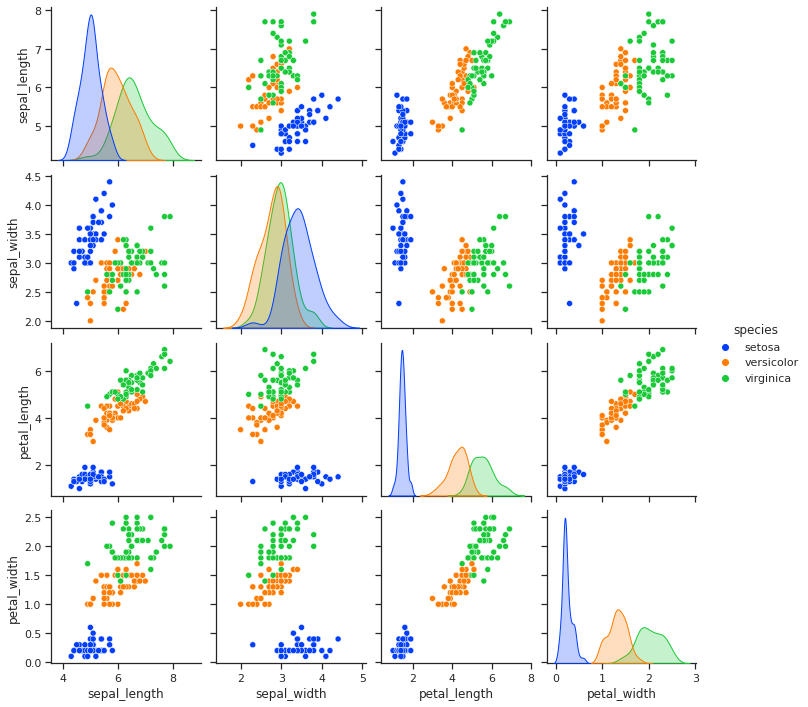

In [7]:
# use seaborne and matplotlib to make the features and the species graph plots
sns.set(style="ticks")
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species",palette="bright")
plt.show()

The above graph is scatterplot which is plotted between four features of iris in 12 different plots. => the samples formed clusters according to their species.

In next graph, plot the 4 features of 3 iris species in barplot:

/home/minhvu/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/minhvu/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


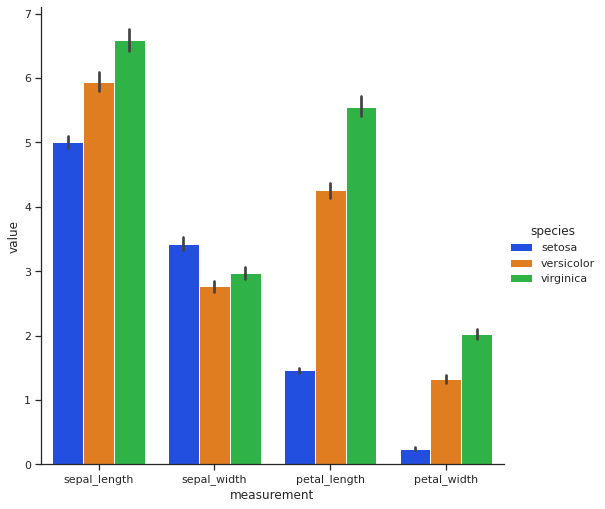

  species   measurement  value
0  setosa  sepal_length    5.1
1  setosa  sepal_length    4.9
2  setosa  sepal_length    4.7
3  setosa  sepal_length    4.6
4  setosa  sepal_length    5.0


In [8]:
piris = pd.melt(iris, "species", var_name="measurement") 
sns.factorplot(x="measurement", y="value", hue="species", data=piris, size=7, kind="bar",palette="bright") 
plt.show() 
print(piris.head())

# LDA step by step 
---
Step 1: Computing the d-dimensional mean vectors

Step 2: Computing the Scatter Matrices

*   2.1 Within-class scatter matrix $S_W$
*   2.2 Between-class scatter matrix $S_B$

Step 3: solve the generalized eigenvalue problem for the matrix $S^{-1}_W*S_B$ to obtain the linear discriminants.

Step 4: Selecting linear discriminants for the new feature subspace
* 4.1. Sorting the eigenvectors by decreasing eigenvalues
* 4.2. Choosing k eigenvectors with the largest eigenvalues

Step 5: Transforming the samples onto the new subspace


# **Step 1: Computing the d-dimensional mean vectors**
In this first step, we will start off with a simple computation of the mean vectors $m_i,(i=1,2,3)$ of the 3 different flower classes:
>$m_i = 
\begin{bmatrix}
\alpha_{\omega_i(sepal-length)} \\ \alpha_{\omega_i(sepal-width)} \\ \alpha_{\omega_i(petal-length)} \\ \alpha_{\omega_i(petal-width)}
\end{bmatrix}  with $ $ i = 1,2,3$ 

In [9]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

Since it is more convenient to work with numerical values, we will use the LabelEncode from the scikit-learn library to convert the class labels into numbers: 1, 2, and 3.

In [11]:
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'setosa', 2: 'versicolor', 3:'virginica'}

In [12]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.428 1.462 0.246]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



# **Step 2: Computing the Scatter Matrices**

Now, we will compute the two 4x4-dimensional matrices: The within-class and the between-class scatter matrix.

**2.1 Within-class scatter matrix $S_W$**

The within-class scatter matrix $S_W$ is computed by the following equation:
$$
S_W = \sum_{i=1}^{c} S_i 
$$
where
$$
S_i = \sum_{x D_i}^{n} (x-m_i)(x-m_i)^T 
$$
and $m_i$ is the mean vector
$$m_i = \frac{1}{n_i} \sum_{x D_i}^{n} x_k $$

In [13]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    # scatter matrix for every class
    class_sc_mat = np.zeros((4,4))                  
    print(X[y == cl])
    print (mv)
    for row in X[y == cl]:
        print(row)
        row = np.reshape(row,(4,1))
        mv = np.reshape(mv,(4,1)) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    # sum class scatter matrices
    S_W += class_sc_mat                             
print('within-class Scatter Matrix:\n', S_W)
# within-class Scatter Matrix:
#  [[ 38.9562  13.683   24.614    5.6556]
#  [ 13.683   17.035    8.12     4.9132]
#  [ 24.614    8.12    27.22     6.2536]
#  [  5.6556   4.9132   6.2536   6.1756]]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]]
[5.006 3.428 1.462 0.246]
[5.1 3.5 1.4 0.2]
[4.9 

In [14]:
mv

array([[6.588],
       [2.974],
       [5.552],
       [2.026]])

Alternatively, we could also compute the class-covariance matrices by adding the scaling factor $\frac{1}{N-1}$ to the within-class scatter matrix, so that our equation becomes
$$\sum_i = \frac{1}{N_i-1} \sum_{i=1}^{c} (N_i-1)\sum_i$$

where $N_i$ is the sample size of the respective class (here: 50), and in this particular case, we can drop the term $(N_i -1) since all classes have the same sample size.

However, the resulting eigenspaces will be identical (identical eigenvectors, only the eigenvalues are scaled differently by a constant factor).

**2.2 Between-class scatter matrix $S_B$**

The between-class scatter matrix $S_B$ is computed by the following equation:
$$S_B = \sum_{i=1}^{c} N_i (m_i-m)(m_i-m)^T$$
where $m$  is the overall mean, and mmi and $N_i$ are the sample mean and sizes of the respective classes.

In [15]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

# between-class Scatter Matrix:
#  [[  63.2121  -19.534   165.1647   71.3631]
#  [ -19.534    10.9776  -56.0552  -22.4924]
#  [ 165.1647  -56.0552  436.6437  186.9081]
#  [  71.3631  -22.4924  186.9081   80.6041]]

between-class Scatter Matrix:
 [[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


# Step 3: solve the generalized eigenvalue problem for the matrix $S^{−1}_W*S_B$ to obtain the linear discriminants.

In [16]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

# Eigenvector 1:
# [[-0.2049]
#  [-0.3871]
#  [ 0.5465]
#  [ 0.7138]]
# Eigenvalue 1: 3.23e+01

# Eigenvector 2:
# [[-0.009 ]
#  [-0.589 ]
#  [ 0.2543]
#  [-0.767 ]]
# Eigenvalue 2: 2.78e-01

# Eigenvector 3:
# [[ 0.179 ]
#  [-0.3178]
#  [-0.3658]
#  [ 0.6011]]
# Eigenvalue 3: -4.02e-17

# Eigenvector 4:
# [[ 0.179 ]
#  [-0.3178]
#  [-0.3658]
#  [ 0.6011]]
# Eigenvalue 4: -4.02e-17


Eigenvector 1: 
[[ 0.2087]
 [ 0.3862]
 [-0.554 ]
 [-0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[-0.8802]
 [ 0.3252]
 [ 0.3101]
 [ 0.1527]]
Eigenvalue 3: -9.74e-16

Eigenvector 4: 
[[ 0.3962]
 [-0.4313]
 [-0.4841]
 [ 0.6501]]
Eigenvalue 4: 2.82e-15


After this decomposition of our square matrix into eigenvectors and eigenvalues, let us briefly recapitulate how we can interpret those results. Both eigenvectors and eigenvalues are providing us with information about the distortion of a linear transformation: The eigenvectors are basically the direction of this distortion, and the eigenvalues are the scaling factor for the eigenvectors that describing the magnitude of the distortion.

If we are performing the LDA for dimensionality reduction, the eigenvectors are important since they will form the new axes of our new feature subspace; the associated eigenvalues are of particular interest since they will tell us how “informative” the new “axes” are.

Let us briefly double-check our calculation and talk more about the eigenvalues below.
$$ Av=\lambda v$$ where $A=S^{-1}_W*S_B*v = Eigenvector$and $\lambda = Eigenvalue$

In [17]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


#Step 4: Selecting linear discriminants for the new feature subspace
**4.1. Sorting the eigenvectors by decreasing eigenvalues**

Remember from the introduction that we are not only interested in merely projecting the data into a subspace that improves the class separability, but also reduces the dimensionality of our feature space, (where the eigenvectors will form the axes of this new feature subspace).

However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1.

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop. The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top $k$ eigenvectors.

In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

# Eigenvalues in decreasing order:

# 32.2719577997
# 0.27756686384
# 5.71450476746e-15
# 5.71450476746e-15

Eigenvalues in decreasing order:

32.19192919827801
0.2853910426230708
2.819450824265891e-15
9.741406743779725e-16


If we take a look at the eigenvalues, we can already see that 2 eigenvalues are close to 0. The reason why these are close to 0 is not that they are not informative but it’s due to floating-point imprecision. In fact, these two last eigenvalues should be exactly zero: In LDA, the number of linear discriminants is at most $c−1$ where $c$ is the number of class labels, since the in-between scatter matrix $S_B$ is the sum of $c$
 matrices with rank 1 or less. Note that in the rare case of perfect collinearity (all aligned sample points fall on a straight line), the covariance matrix would have rank one, which would result in only one eigenvector with a nonzero eigenvalue

In [19]:
#express the “explained variance” as percentage
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

# Variance explained:

# eigenvalue 1: 99.15%
# eigenvalue 2: 0.85%
# eigenvalue 3: 0.00%
# eigenvalue 4: 0.00%

Variance explained:

eigenvalue 1: 99.12%
eigenvalue 2: 0.88%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


The first eigenpair is by far the most informative one, and we won’t loose much information if we would form a 1D-feature spaced based on this eigenpair.

**4.2. Choosing k eigenvectors with the largest eigenvalues**

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our $k * d-dimentional$ eigenvector matrix $W$ (here 4×2: based on the 2 most informative eigenpairs) and thereby reducing the initial 4-dimensional feature space into a 2-dimensional feature subspace.

In [20]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

# Matrix W:
#  [[ 0.2049 -0.009 ]
#  [ 0.3871 -0.589 ]
#  [-0.5465  0.2543]
#  [-0.7138 -0.767 ]]

Matrix W:
 [[ 0.2087 -0.0065]
 [ 0.3862 -0.5866]
 [-0.554   0.2526]
 [-0.7074 -0.7695]]


#Step 5: Transforming the samples onto the new subspace
In the last step, we use the $4 * 2 - dimensinal$ matrix $W$ that we just computed to transform our samples onto the new subspace via the equation $Y =X * W$ where $X$ is a $n * d -dimensional$ matrix representing the $n$ samples, and $Y$ are the transformed $n * k - dimensional$ sample in the new subspace.

In [21]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

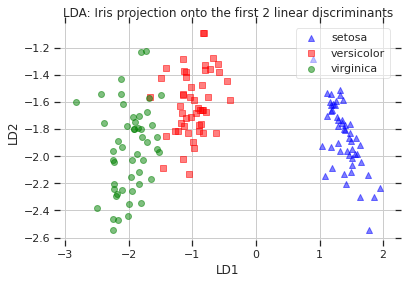

In [22]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

# LDA in scikit-learn

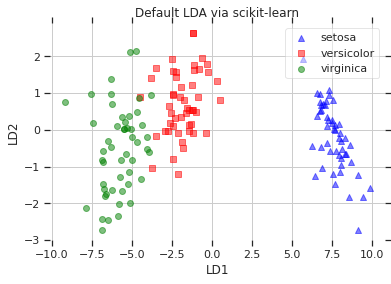

In [23]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')